<a href="https://colab.research.google.com/github/michael0806/Front-end-Developer-Technical-Test/blob/master/baseline_model__withcrime_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import os
import warnings  
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Lab 02/data_withcrime_31.csv")

In [ ]:
df.head()

,averge_room,Male,Female,Average Age,European,Māori,Pacific Peoples,Asian,Middle Eastern / Latin American / African,Other Ethnicity,...,mean_FA,mean_AR,mean_bed,mean_Bath,mean_Price,mean_school,weighted_weapon,weighted_crime,Number_of_happens,Number of Victimisations
0,2.684211,0.580000,0.420000,41.423077,0.703125,0.265625,0.000000,0.000000,0.0,0.015625,...,87.0,0.16005,2.0,1.0,12.577041,0.0,0.0,0.470588,8.0,8.0
1,2.161290,0.547170,0.452830,50.076923,0.746032,0.142857,0.047619,0.015873,0.0,0.015873,...,77.0,0.08790,2.0,1.0,12.396693,0.0,0.0,0.647059,11.0,11.0
2,2.266667,0.568182,0.431818,48.190476,0.788462,0.173077,0.019231,0.019231,0.0,0.000000,...,77.0,0.08300,2.0,1.0,12.013701,0.0,0.0,0.647059,11.0,12.0
3,2.894737,0.534884,0.465116,48.162791,0.836735,0.102041,0.000000,0.020408,0.0,0.020408,...,45.0,0.11410,1.0,1.0,12.236150,0.0,NaN,NaN,NaN,NaN
4,2.882353,0.640000,0.360000,51.130435,0.884615,0.038462,0.000000,0.000000,0.0,0.038462,...,84.0,0.08420,2.0,1.0,12.706848,0.0,0.0,0.647059,11.0,11.0


In [ ]:
#Check whether there is any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7938 entries, 0 to 7937
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   averge_room                                7938 non-null   float64
 1   Male                                       7938 non-null   float64
 2   Female                                     7938 non-null   float64
 3   Average Age                                7938 non-null   float64
 4   European                                   7938 non-null   float64
 5   Māori                                      7938 non-null   float64
 6   Pacific Peoples                            7938 non-null   float64
 7   Asian                                      7938 non-null   float64
 8   Middle Eastern / Latin American / African  7938 non-null   float64
 9   Other Ethnicity                            7938 non-null   float64
 10  New Zealander(19)       

In [ ]:
#Check how many unique values are present in each column
for value in df:
    print('For {},{} unique values present'.format(value,df[value].nunique()))

For averge_room,819 unique values present
For Male,632 unique values present
For Female,632 unique values present
For Average Age,4441 unique values present
For European,2314 unique values present
For Māori,1126 unique values present
For Pacific Peoples,1610 unique values present
For Asian,1886 unique values present
For Middle Eastern / Latin American / African,442 unique values present
For Other Ethnicity,258 unique values present
For New Zealander(19),208 unique values present
For Other Ethnicity nec(19),204 unique values present
For Median personal income($),584 unique values present
For Employed Full time,586 unique values present
For Employed Part time,596 unique values present
For Unemployed,435 unique values present
For Paid employee,727 unique values present
For Employer,409 unique values present
For Self employed and without employees,536 unique values present
For Unpaid family worker,197 unique values present
For mean_CV,730 unique values present
For mean_FA,435 unique values

In [ ]:
cor = df.corr()
cor

,averge_room,Male,Female,Average Age,European,Māori,Pacific Peoples,Asian,Middle Eastern / Latin American / African,Other Ethnicity,...,mean_FA,mean_AR,mean_bed,mean_Bath,mean_Price,mean_school,weighted_weapon,weighted_crime,Number_of_happens,Number of Victimisations
averge_room,1.000000,-0.002313,0.002313,-0.039170,0.075822,-0.113173,-0.089236,0.047517,-0.155447,0.029773,...,0.568737,0.224737,0.584982,0.453274,0.257545,0.101780,-0.126667,-0.140016,-0.140016,-0.136570
Male,-0.002313,1.000000,-1.000000,-0.217846,-0.134411,0.064918,0.047955,0.102172,0.030510,0.001408,...,-0.101805,0.061531,-0.065553,-0.082522,-0.127920,-0.054149,0.079628,0.082622,0.082622,0.078562
Female,0.002313,-1.000000,1.000000,0.217846,0.134411,-0.064918,-0.047955,-0.102172,-0.030510,-0.001408,...,0.101805,-0.061531,0.065553,0.082522,0.127920,0.054149,-0.079628,-0.082622,-0.082622,-0.078562
Average Age,-0.039170,-0.217846,0.217846,1.000000,0.571133,-0.381244,-0.495922,-0.132650,-0.068427,0.045585,...,0.362155,0.106315,0.164953,0.279832,0.392039,0.154862,-0.060312,0.002017,0.002017,0.003303
European,0.075822,-0.134411,0.134411,0.571133,1.000000,-0.343763,-0.689876,-0.531511,-0.127778,0.063594,...,0.308673,0.233369,0.139690,0.252964,0.446976,0.162322,-0.129460,-0.063920,-0.063920,-0.059822
Māori,-0.113173,0.064918,-0.064918,-0.381244,-0.343763,1.000000,0.488866,-0.378197,-0.186992,-0.139854,...,-0.414083,0.057853,-0.238866,-0.372875,-0.469285,-0.404198,0.090405,0.010931,0.010931,0.009858
Pacific Peoples,-0.089236,0.047955,-0.047955,-0.495922,-0.689876,0.488866,1.000000,-0.178636,-0.119751,-0.180967,...,-0.428658,-0.063362,-0.216192,-0.362911,-0.500680,-0.328852,0.066954,-0.020616,-0.020616,-0.021482
Asian,0.047517,0.102172,-0.102172,-0.132650,-0.531511,-0.378197,-0.178636,1.000000,0.220175,0.004437,...,0.157776,-0.251966,0.120846,0.148866,0.060594,0.243627,0.069014,0.096554,0.096554,0.092670
Middle Eastern / Latin American / African,-0.155447,0.030510,-0.030510,-0.068427,-0.127778,-0.186992,-0.119751,0.220175,1.000000,0.045284,...,-0.025537,-0.178694,-0.071908,0.011407,0.027738,0.078518,0.018265,0.035627,0.035627,0.033609
Other Ethnicity,0.029773,0.001408,-0.001408,0.045585,0.063594,-0.139854,-0.180967,0.004437,0.045284,1.000000,...,0.070068,0.006026,0.040948,0.066434,0.046428,0.051955,-0.021717,-0.020448,-0.020448,-0.020193


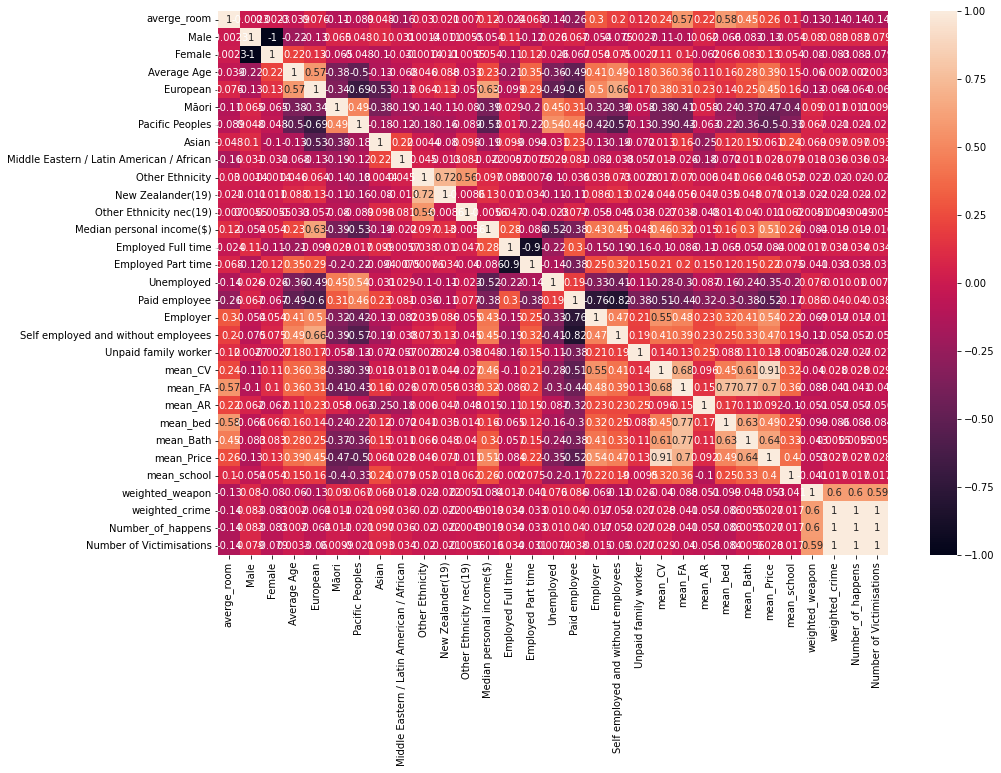

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(cor, annot=True)

In [ ]:
df.shape

(7938, 31)

In [ ]:
df2 = df.fillna(df.mean())

In [ ]:
 #Building our model using different regression models
 # X(Independent variables) and y(target variables) 
X = df2.drop(['mean_Price'], axis=1)
Y = df2['mean_Price']

In [ ]:
print(X.shape, Y.shape)

(7938, 30) (7938,)


In [ ]:
# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape, X_valid.shape)

(6350, 30) (1588, 30)


In [ ]:
pd.value_counts(Y_train)

12.834681    22
12.660328    21
12.748397    20
12.804909    20
12.742566    19
             ..
12.656534     1
12.610687     1
12.884151     1
13.606501     1
13.300917     1
Name: mean_Price, Length: 3416, dtype: int64

In [ ]:
#Random Forest Regression Model
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,Y_train)
rf_regressor.score(X_valid,Y_valid)
rf_pred =rf_regressor.predict(X_valid)
rf_score=rf_regressor.score(X_valid,Y_valid)
expl_rf = explained_variance_score(rf_pred,Y_valid)

In [ ]:
rf_RMSE = np.sqrt(mean_squared_error(Y_valid, rf_pred))

In [ ]:
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_valid,Y_valid)*100))

Random Forest Regression Model Score is  94


In [ ]:
#Decision Tree Regression Model
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,Y_train)
tr_regressor.score(X_valid,Y_valid)
pred_tr = tr_regressor.predict(X_valid)
decision_score=tr_regressor.score(X_valid,Y_valid)
expl_tr = explained_variance_score(pred_tr,Y_valid)

In [ ]:
tr_RMSE = np.sqrt(mean_squared_error(Y_valid, pred_tr))

In [ ]:
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_valid,Y_valid)*100))

Decision tree  Regression Model Score is  90


In [ ]:
#Multiple Linear Regression Model
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train,Y_train)
mlr_score = mlr.score(X_valid,Y_valid)
pred_mlr = mlr.predict(X_valid)
expl_mlr = explained_variance_score(pred_mlr,Y_valid)

In [ ]:
mlr_RMSE = np.sqrt(mean_squared_error(Y_valid, pred_mlr))

In [ ]:
print("Multiple Linear Regression Model Score is ",round(mlr.score(X_valid,Y_valid)*100))

Multiple Linear Regression Model Score is  87


In [ ]:
models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Accuracy_train_Score':[mlr_score,decision_score,rf_score],
                            'Accuracy_test_Score':[expl_mlr,expl_tr,expl_rf],
                            'RMSE: ':[mlr_RMSE,tr_RMSE,rf_RMSE]
                           })
models_score.sort_values(by='Accuracy_train_Score',ascending=False)

,Model,Accuracy_train_Score,Accuracy_test_Score,RMSE:
2,Random forest Regression,0.941982,0.940008,0.112660
1,Decision Tree,0.895401,0.897329,0.151269
0,Multiple Linear Regression,0.868457,0.850427,0.169637
